### The aim of this project is to predict the employee salary based on different factors provided in the dataset. The output variable (Salary)is a continous variable. So linear regression should be carried out

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("1000 Records.csv")
df.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


In [3]:
df.shape

(1000, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
Emp ID                    1000 non-null int64
Name Prefix               1000 non-null object
First Name                1000 non-null object
Middle Initial            1000 non-null object
Last Name                 1000 non-null object
Gender                    1000 non-null object
E Mail                    1000 non-null object
Father's Name             1000 non-null object
Mother's Name             1000 non-null object
Mother's Maiden Name      1000 non-null object
Date of Birth             1000 non-null object
Time of Birth             1000 non-null object
Age in Yrs.               1000 non-null float64
Weight in Kgs.            1000 non-null int64
Date of Joining           1000 non-null object
Quarter of Joining        1000 non-null object
Half of Joining           1000 non-null object
Year of Joining           1000 non-null int64
Month of Joining          1000 non-null int64
Mont

In [5]:
#Dropping some columns as they make no impact on the output variable
df.drop(['Emp ID','First Name','Middle Initial','Last Name',"Father's Name","Mother's Name","Mother's Maiden Name",'Date of Birth','Time of Birth',
        'User Name','Password'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
Name Prefix               1000 non-null object
Gender                    1000 non-null object
E Mail                    1000 non-null object
Age in Yrs.               1000 non-null float64
Weight in Kgs.            1000 non-null int64
Date of Joining           1000 non-null object
Quarter of Joining        1000 non-null object
Half of Joining           1000 non-null object
Year of Joining           1000 non-null int64
Month of Joining          1000 non-null int64
Month Name of Joining     1000 non-null object
Short Month               1000 non-null object
Day of Joining            1000 non-null int64
DOW of Joining            1000 non-null object
Short DOW                 1000 non-null object
Age in Company (Years)    1000 non-null float64
Salary                    1000 non-null int64
Last % Hike               1000 non-null object
SSN                       1000 non-null object
Phon

In [6]:
df.head()

,Name Prefix,Gender,E Mail,Age in Yrs.,Weight in Kgs.,Date of Joining,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,...,Salary,Last % Hike,SSN,Phone No.,Place Name,County,City,State,Zip,Region
0,Ms.,F,shawna.buck@gmail.com,45.66,44,12/18/2010,Q4,H2,2010,12,...,119090,17%,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West
1,Mr.,M,nathaniel.burke@walmart.com,23.76,52,4/25/2017,Q2,H1,2017,4,...,117991,14%,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest
2,Drs.,F,elisabeth.foster@gmail.com,22.68,42,3/27/2017,Q1,H1,2017,3,...,161045,28%,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South
3,Mrs.,F,briana.lancaster@yahoo.com,41.70,43,2/25/2003,Q1,H1,2003,2,...,142616,16%,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest
4,Hon.,F,estella.potter@gmail.com,22.39,58,10/11/2016,Q4,H2,2016,10,...,135706,11%,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West


In [7]:
df.drop(['E Mail','SSN','Zip','Short DOW'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Name Prefix               1000 non-null object
Gender                    1000 non-null object
Age in Yrs.               1000 non-null float64
Weight in Kgs.            1000 non-null int64
Date of Joining           1000 non-null object
Quarter of Joining        1000 non-null object
Half of Joining           1000 non-null object
Year of Joining           1000 non-null int64
Month of Joining          1000 non-null int64
Month Name of Joining     1000 non-null object
Short Month               1000 non-null object
Day of Joining            1000 non-null int64
DOW of Joining            1000 non-null object
Age in Company (Years)    1000 non-null float64
Salary                    1000 non-null int64
Last % Hike               1000 non-null object
Phone No.                 1000 non-null object
Place Name                1000 non-null object
County                    1000 non-null object
City

In [8]:
df['Region'].value_counts()

South        371
Midwest      285
Northeast    182
West         162
Name: Region, dtype: int64

In [9]:
df['State'].value_counts()

PA    62
CA    57
TX    54
NY    51
FL    37
IL    35
VA    34
OH    33
KY    33
NC    31
IA    31
MO    30
WI    30
IN    24
MI    23
KS    22
MN    22
GA    19
WV    19
MS    19
WA    19
AL    19
OK    18
LA    17
AR    17
ME    16
NE    16
TN    16
MA    15
CO    15
NJ    15
ND    14
SC    14
OR    12
MD    12
AK    11
CT    10
AZ    10
MT     9
NH     9
NM     8
WY     7
DE     6
DC     6
UT     6
ID     6
SD     5
VT     3
NV     2
RI     1
Name: State, dtype: int64

In [10]:
df['State'].value_counts().count()

50

In [11]:
df['County'].value_counts()

Jefferson                 15
Montgomery                12
Los Angeles               11
Jackson                    9
Franklin                   9
Washington                 8
Marion                     8
Orange                     8
Johnson                    7
Dallas                     7
Lake                       7
Riverside                  6
Fulton                     6
St. Louis                  6
Clay                       5
Madison                    5
Monroe                     5
Hamilton                   5
Oakland                    5
Essex                      5
New York                   5
Hillsborough               5
Hancock                    5
Northampton                5
Lee                        4
Marshall                   4
Sullivan                   4
Winnebago                  4
Milwaukee                  4
Putnam                     4
                          ..
Iowa                       1
Spartanburg                1
Baltimore (city)           1
Harnett       

In [12]:
df['Place Name'].value_counts().count()

880

In [13]:
df.columns

Index(['Name Prefix', 'Gender', 'Age in Yrs.', 'Weight in Kgs.',
       'Date of Joining', 'Quarter of Joining', 'Half of Joining',
       'Year of Joining', 'Month of Joining', 'Month Name of Joining',
       'Short Month', 'Day of Joining', 'DOW of Joining',
       'Age in Company (Years)', 'Salary', 'Last % Hike', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Region'],
      dtype='object')

In [14]:
df['Date of Joining'].value_counts().count()

942

In [15]:
df['Half of Joining'].value_counts().count()

2

In [16]:
df['Quarter of Joining'].value_counts().count()

4

In [17]:
df['Year of Joining'].value_counts()

2016    85
2017    68
2015    68
2013    66
2012    53
2014    52
2009    52
2011    51
2010    41
2006    39
2007    36
2001    35
2004    31
2008    31
2005    31
1999    30
2002    25
2003    24
2000    23
1998    18
1995    16
1994    15
1996    12
1985    12
1987    12
1990    12
1993    11
1997    10
1988     7
1992     7
1989     6
1991     5
1981     4
1986     3
1983     3
1984     2
1982     2
1980     2
Name: Year of Joining, dtype: int64

In [18]:
df['Month of Joining'].value_counts()

4     107
10     92
5      88
8      87
2      83
6      81
1      81
11     80
12     79
3      79
7      77
9      66
Name: Month of Joining, dtype: int64

In [19]:
df['Month Name of Joining'].value_counts()

April        107
October       92
May           88
August        87
February      83
June          81
January       81
November      80
December      79
March         79
July          77
September     66
Name: Month Name of Joining, dtype: int64

In [20]:
df['Short Month'].value_counts()

Apr    107
Oct     92
May     88
Aug     87
Feb     83
Jun     81
Jan     81
Nov     80
Dec     79
Mar     79
Jul     77
Sep     66
Name: Short Month, dtype: int64

In [21]:
df['Day of Joining'].value_counts()

25    48
27    41
1     40
26    39
24    38
20    37
15    37
22    36
2     36
14    35
18    35
11    35
17    34
8     34
23    33
30    33
29    33
28    32
12    31
21    31
9     30
16    30
13    30
7     29
5     26
10    25
6     24
19    24
3     23
4     22
31    19
Name: Day of Joining, dtype: int64

In [22]:
df['DOW of Joining'].value_counts()

Sunday       158
Friday       154
Saturday     153
Wednesday    145
Monday       138
Tuesday      129
Thursday     123
Name: DOW of Joining, dtype: int64

In [23]:
df['City'].value_counts().count()

880

In [24]:
df['Place Name'].value_counts().count()

880

In [25]:
#Dropping some more columns of which some donot have impact on output variable. Some other columns are redundat as their information is already present in other columns
df.drop(['Place Name','City','DOW of Joining','Day of Joining','County','Weight in Kgs.','Phone No. ','State','Month Name of Joining','Short Month','Date of Joining'],axis=1,inplace=True)
df.columns

Index(['Name Prefix', 'Gender', 'Age in Yrs.', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Age in Company (Years)', 'Salary', 'Last % Hike', 'Region'],
      dtype='object')

In [26]:
df['Name Prefix'].value_counts()

Mr.      347
Ms.      227
Mrs.     161
Hon.      89
Dr.       64
Drs.      58
Prof.     54
Name: Name Prefix, dtype: int64

## Binning of Age and Last % Hike features

In [27]:
s=pd.cut(df["Year of Joining"],bins=[1979,1989,1999,2009,2019],labels=[1,2,3,4])
temp=pd.DataFrame(s)
df.drop('Year of Joining',axis=1,inplace=True)

In [28]:
#Concatenating the column with bins to existing dataframe
df=pd.concat([df,temp],axis=1)
df.head()

,Name Prefix,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Month of Joining,Age in Company (Years),Salary,Last % Hike,Region,Year of Joining
0,Ms.,F,45.66,Q4,H2,12,6.61,119090,17%,West,4
1,Mr.,M,23.76,Q2,H1,4,0.26,117991,14%,Midwest,4
2,Drs.,F,22.68,Q1,H1,3,0.34,161045,28%,South,4
3,Mrs.,F,41.70,Q1,H1,2,14.43,142616,16%,Midwest,3
4,Hon.,F,22.39,Q4,H2,10,0.79,135706,11%,West,4


In [29]:
#Changing the datatype 
df['Year of Joining']=df['Year of Joining'].astype('int')

In [30]:
#Stripping off the '%' symbol
df['Last % Hike']=df['Last % Hike'].str.strip('%')

In [31]:
df['Last % Hike']=df['Last % Hike'].astype('int')

In [32]:
t=pd.cut(df["Last % Hike"],bins=[-1,4,9,14,19,24,29,34],labels=[1,2,3,4,5,6,7])

In [33]:
tempr=pd.DataFrame(t)
df.drop('Last % Hike',axis=1,inplace=True)

In [34]:
df=pd.concat([df,tempr],axis=1)
df.head()

,Name Prefix,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Month of Joining,Age in Company (Years),Salary,Region,Year of Joining,Last % Hike
0,Ms.,F,45.66,Q4,H2,12,6.61,119090,West,4,4
1,Mr.,M,23.76,Q2,H1,4,0.26,117991,Midwest,4,3
2,Drs.,F,22.68,Q1,H1,3,0.34,161045,South,4,6
3,Mrs.,F,41.70,Q1,H1,2,14.43,142616,Midwest,3,4
4,Hon.,F,22.39,Q4,H2,10,0.79,135706,West,4,3


## EDA

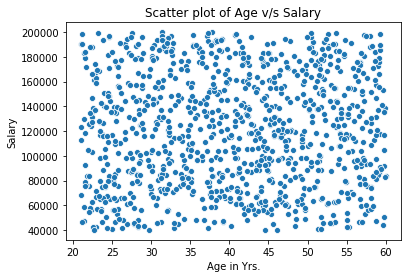

In [35]:
sns.scatterplot(df['Age in Yrs.'],df['Salary'])
plt.title("Scatter plot of Age v/s Salary")
plt.show()

From the above scatter plot, it can be seen that there is no specific relation between Age and Salary

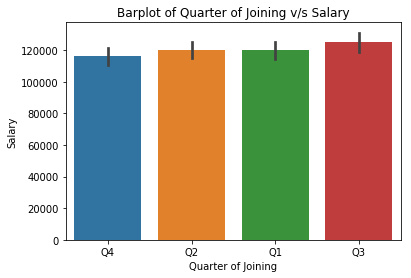

In [36]:
sns.barplot(df['Quarter of Joining'],df['Salary'])
plt.title("Barplot of Quarter of Joining v/s Salary")
plt.show()

Employees who have joined in Q4 are earning slightly more than employees who joined in other Quarters

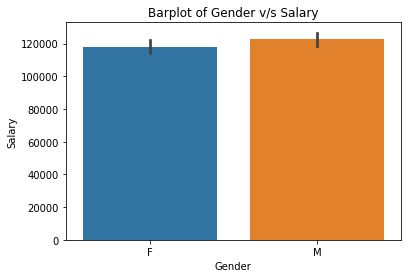

In [37]:
sns.barplot(df['Gender'],df['Salary'])
plt.title('Barplot of Gender v/s Salary')
plt.show()

From the barplot, it can be seen that both the Genders earn almost the same

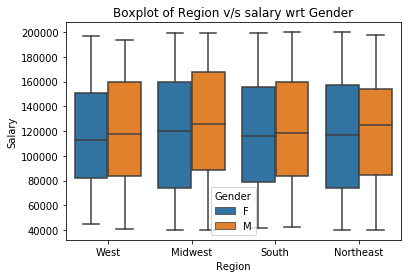

In [38]:
sns.boxplot(df['Region'],df['Salary'],hue=df['Gender'])
plt.title('Boxplot of Region v/s salary wrt Gender')
plt.show()

From the above boxplot, it can be observed that males in all regions earn slightly more than females

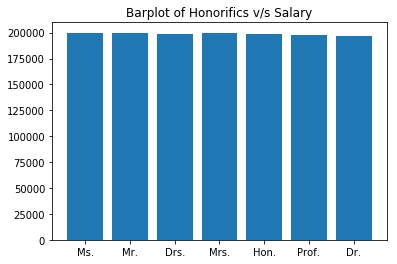

In [39]:
plt.bar(df['Name Prefix'],df['Salary'])
plt.title('Barplot of Honorifics v/s Salary')
plt.show()

From the above bar graph, it can be seen that all the honorifics were paid almost the same

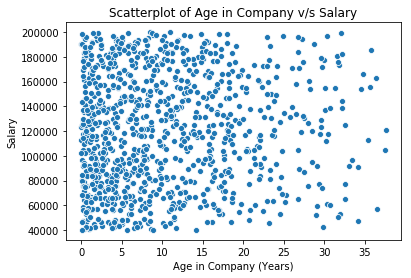

In [40]:
sns.scatterplot(df['Age in Company (Years)'],df['Salary'])
plt.title("Scatterplot of Age in Company v/s Salary")
plt.show()

From the above scatter plot,years of experience in the company doesn't affect salary to that extent. It can also be seen that most of the employees are present in the company from past 20 years.

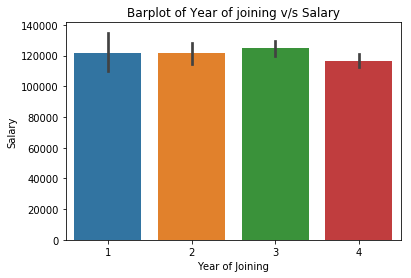

In [41]:
sns.barplot(df['Year of Joining'],df['Salary'])
plt.title('Barplot of Year of joining v/s Salary')
plt.show()

From the above barplot, category 3 ie. joining between 1999-2009 earn more salary than other categories

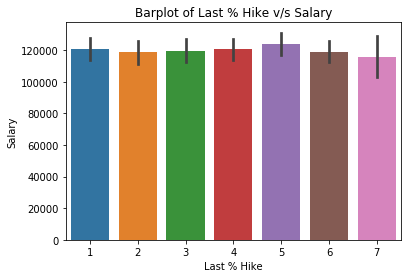

In [42]:
sns.barplot(df['Last % Hike'],df['Salary'])
plt.title('Barplot of Last % Hike v/s Salary')
plt.show()

Employees who received a hike of 20 to 24% recently, have higher salaries as compared to others.

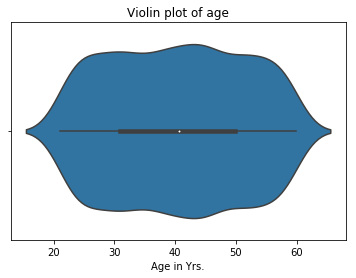

In [43]:
sns.violinplot(df['Age in Yrs.'])
plt.title("Violin plot of age")
plt.show()

From the above violin plot , it can be seen that most of the employees lie between 25-55 years of age.

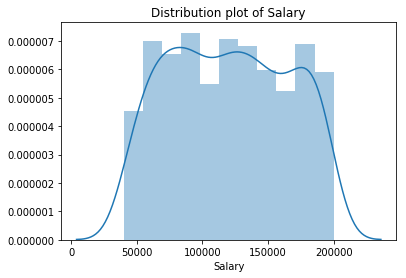

In [44]:
sns.distplot(df["Salary"])
plt.title("Distribution plot of Salary")
plt.show()

From the above distplot, it can be seen that salary mostly lie between 55,000 to 1,75,000.

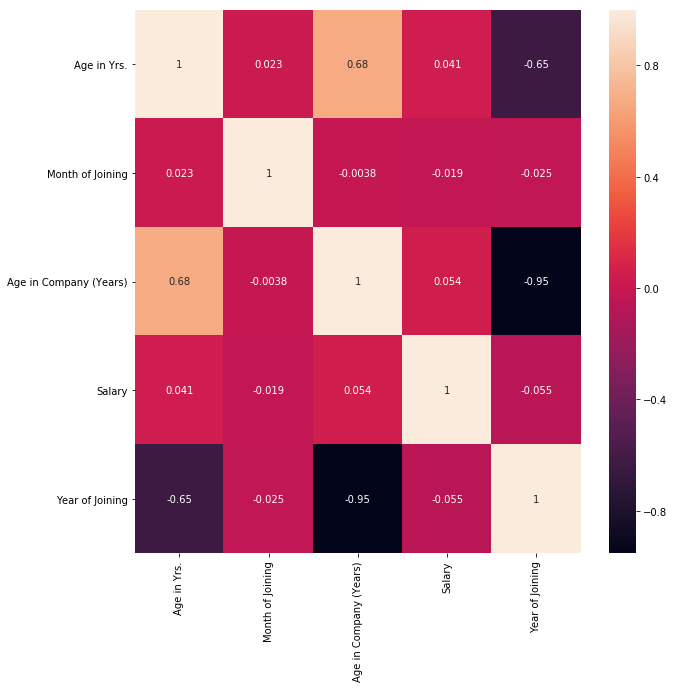

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the heatmap, we can observe that Salary is positively correlated with the years employees have spent in the organization, their age and negatively correlated with Year employee has joined and month of joining.

## Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
df['Gender']=le.fit_transform(df['Gender'])
df['Quarter of Joining']=le.fit_transform(df['Quarter of Joining'])
df['Half of Joining']=le.fit_transform(df['Half of Joining'])
df['Region']=le.fit_transform(df['Region'])

## Get dummies method for other object columns

In [48]:
status=pd.get_dummies(df['Name Prefix'],drop_first=True,prefix='Name_prefix')
df=pd.concat([df,status],axis=1)
df.drop('Name Prefix',axis=1,inplace=True)


In [49]:
#Applying label encoding
df['Year of Joining']=le.fit_transform(df['Year of Joining'])

In [50]:
df.head()

,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Month of Joining,Age in Company (Years),Salary,Region,Year of Joining,Last % Hike,Name_prefix_Drs.,Name_prefix_Hon.,Name_prefix_Mr.,Name_prefix_Mrs.,Name_prefix_Ms.,Name_prefix_Prof.
0,0,45.66,3,1,12,6.61,119090,3,3,4,0,0,0,0,1,0
1,1,23.76,1,0,4,0.26,117991,0,3,3,0,0,1,0,0,0
2,0,22.68,0,0,3,0.34,161045,2,3,6,1,0,0,0,0,0
3,0,41.70,0,0,2,14.43,142616,0,2,4,0,0,0,1,0,0
4,0,22.39,3,1,10,0.79,135706,3,3,3,0,1,0,0,0,0


In [51]:
df['Year of Joining'].value_counts()

3    484
2    327
1    136
0     53
Name: Year of Joining, dtype: int64

3---->2009-2018   2---->1999-2008   1---->1989-1998   0---->1979-1988

In [52]:
df['Last % Hike'].value_counts()

4    175
5    173
6    165
1    157
2    149
3    141
7     40
Name: Last % Hike, dtype: int64

1--->0% to 4%     
2--->5% to 9%   
3--->10% to 14%    
4--->15% to 19%   
5--->20% to 24%  
6--->25% to 29%  
7--->30% to 34%

In [53]:
status=pd.get_dummies(df['Last % Hike'],drop_first=True,prefix='Last % Hike')
df=pd.concat([df,status],axis=1)
df.drop('Last % Hike',axis=1,inplace=True)

In [54]:
df.dtypes

Gender                      int32
Age in Yrs.               float64
Quarter of Joining          int32
Half of Joining             int32
Month of Joining            int64
Age in Company (Years)    float64
Salary                      int64
Region                      int32
Year of Joining             int64
Name_prefix_Drs.            uint8
Name_prefix_Hon.            uint8
Name_prefix_Mr.             uint8
Name_prefix_Mrs.            uint8
Name_prefix_Ms.             uint8
Name_prefix_Prof.           uint8
Last % Hike_2               uint8
Last % Hike_3               uint8
Last % Hike_4               uint8
Last % Hike_5               uint8
Last % Hike_6               uint8
Last % Hike_7               uint8
dtype: object

## Checking for outliers

In [55]:
df.skew()

Gender                   -0.036060
Age in Yrs.               0.006173
Quarter of Joining        0.045158
Half of Joining           0.076169
Month of Joining          0.057287
Age in Company (Years)    0.968211
Salary                    0.034356
Region                   -0.069554
Year of Joining          -0.959521
Name_prefix_Drs.          3.787608
Name_prefix_Hon.          2.891145
Name_prefix_Mr.           0.643802
Name_prefix_Mrs.          1.847515
Name_prefix_Ms.           1.305396
Name_prefix_Prof.         3.952525
Last % Hike_2             1.974383
Last % Hike_3             2.066191
Last % Hike_4             1.713245
Last % Hike_5             1.731626
Last % Hike_6             1.807764
Last % Hike_7             4.701911
dtype: float64

## Define X and y

In [56]:
X=df.drop('Salary',axis=1)
X.head()

,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Month of Joining,Age in Company (Years),Region,Year of Joining,Name_prefix_Drs.,Name_prefix_Hon.,Name_prefix_Mr.,Name_prefix_Mrs.,Name_prefix_Ms.,Name_prefix_Prof.,Last % Hike_2,Last % Hike_3,Last % Hike_4,Last % Hike_5,Last % Hike_6,Last % Hike_7
0,0,45.66,3,1,12,6.61,3,3,0,0,0,0,1,0,0,0,1,0,0,0
1,1,23.76,1,0,4,0.26,0,3,0,0,1,0,0,0,0,1,0,0,0,0
2,0,22.68,0,0,3,0.34,2,3,1,0,0,0,0,0,0,0,0,0,1,0
3,0,41.70,0,0,2,14.43,0,2,0,0,0,1,0,0,0,0,1,0,0,0
4,0,22.39,3,1,10,0.79,3,3,0,1,0,0,0,0,0,1,0,0,0,0


In [57]:
y=df['Salary']
y.head()

0    119090
1    117991
2    161045
3    142616
4    135706
Name: Salary, dtype: int64

## Train_test_split

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [60]:
#fit the model to train data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
#train data
y_pred_train=lr.predict(X_train)

In [62]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.028738939339642555

## Scaling done using standard scaler

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=101)

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [66]:
df_train_scaled=pd.DataFrame(sc.fit_transform(df_train),columns=df.columns)
df_test_scaled=pd.DataFrame(sc.transform(df_test),columns=df.columns)

In [67]:
df_train_scaled.shape

(700, 21)

In [68]:
df_test_scaled.shape

(300, 21)

In [69]:
X_train=df_train_scaled.drop("Salary",axis=1)
X_test=df_test_scaled.drop("Salary",axis=1)

In [70]:
y_train=df_train_scaled.Salary
y_test=df_test_scaled.Salary

In [71]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [72]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
y_train_pred=lr.predict(X_train)

In [74]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.028738939339642555

In [75]:
y_test_pred=lr.predict(X_test)

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

-0.06809400212064554

I don't know what and where I have missed something because of which my model isn't working. Please provide me suggestions 
where should I correct something to get my model working. 